## Import Dependencies

In [1]:
import numpy as np
import sympy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from typing import List, Tuple, Dict, Callable

## Import Data

In [2]:
df = pd.read_csv('./fish.csv', sep=',', header=0)
df.head()

,Weight,Length,Width
0,67,9.3,1.0476
1,75,10.0,1.1600
2,70,10.1,1.1484
3,72,10.1,1.1821
4,79,10.2,1.2560


## Part 1

In [53]:
def gradient_descent_b(df: pd.DataFrame, b_start: float, alpha: float = 0.01, epsilon: float = 0.0001, max_iter: int = 100):
    def E(df: pd.DataFrame, b: float, a: float = 0.0):
        y_true = df['Weight']
        y_hat = b * df['Length']
        err = y_true - y_hat
        return (err ** 2).mean()

    def E_b(df:pd.DataFrame, b: float, a: float = 0.0):
        y_true = df['Weight']
        y_hat = b * df['Length']
        err = y_true - y_hat
        return -2 * (err * df['Length']).mean()

    def gradient_descent(
        df: pd.DataFrame,
        f: Callable, f_b: Callable, b_start: float,
        alpha: float = 0.01, epsilon: float = 0.0001,
        max_iter: int = 100
    ):
        b = b_start
        difference = epsilon + 1
        e = f(df, b)

        print(f'i=0; b={b:.2f}; e={e:.2f}')

        for i in range(1, max_iter + 1):
            b_next = b - alpha * f_b(df, b)
            e_next = f(df, b_next)
            difference = abs(e_next - e)
            print(f'\ri={i}; b={b:10.5f}; e={e:10.5f}', end='')
            b = b_next
            e = e_next
            if difference < epsilon:
                break
        
        print(f'\ni={i}; b={b:.5f}; e={e:.5f}')

    gradient_descent(df=df, f=E, f_b=E_b, b_start=b_start, alpha=alpha, epsilon=epsilon, max_iter=max_iter)

gradient_descent_b(df=df, b_start=8, alpha=0.004, epsilon=0.00001, max_iter=100)

i=0; b=8.00; e=1715.87
i=5; b=  10.55546; e= 851.30938
i=5; b=10.55549; e=851.30938


## Part 2

In [88]:
def gradient_descent_a_b(
    df: pd.DataFrame, 
    a_start: float, b_start: float,
    alpha: float = 0.01, epsilon: float = 0.0001, max_iter: int = 100
):

    def E(df: pd.DataFrame, a: float, b: float):
        y_true = df['Weight']
        y_hat = b * df['Length'] + a
        err = y_true - y_hat
        return (err ** 2).mean()
    
    def E_a(df: pd.DataFrame, a: float, b: float):
        y_true = df['Weight']
        y_hat = b * df['Length'] + a
        err = y_true - y_hat
        return -2 * err.mean()

    def E_b(df:pd.DataFrame, a: float, b: float):
        y_true = df['Weight']
        y_hat = b * df['Length'] + a
        err = y_true - y_hat
        return -2 * (err * df['Length']).mean()

    def gradient_descent(
        df: pd.DataFrame,
        f: Callable, f_a: Callable, f_b: Callable,
        a_start: float, b_start: float,
        alpha: float = 0.001, epsilon: float = 0.0001,
        max_iter: int = 100
    ):

        a = a_start
        b = b_start
        difference = epsilon + 1
        e = f(df, a=a, b=b)

        print(f'i=0; a={a:10.2f}; b={b:10.2f}; e={e:10.2f}')

        for i in range(1, max_iter + 1):
            pd_b = f_b(df, a=a, b=b)
            pd_a = f_a(df, a=a, b=b)
            b_next = b - alpha * pd_b
            a_next = a - alpha * pd_a
            e_next = f(df, a=a_next, b=b_next)
            difference = abs(e_next - e)
            print(f'\ri={i}; a={a:10.5f}; b={b:10.5f}; e={e:10.5f}', end='')
            if min(difference, pd_a ** 2 + pd_b ** 2) < epsilon:
                break
            b = b_next
            a = a_next
            e = e_next

        print(f'\ni={i}; a={a:10.5f}; b={b:10.5f}; e={e:10.5f}; v={pd_a ** 2 + pd_b ** 2}')

    gradient_descent(df=df, f=E, f_a=E_a, f_b=E_b, a_start=a_start, b_start=b_start, alpha=alpha, epsilon=epsilon, max_iter=max_iter)

gradient_descent_a_b(df=df, a_start=-250, b_start=30, alpha=0.007, epsilon=0.001, max_iter=1000)

i=0; a=   -250.00; b=     30.00; e=    765.76
i=49; a=-249.92471; b=  32.16480; e= 140.22051
i=49; a=-249.92471; b=  32.16480; e= 140.22051; v=0.49598513403284294


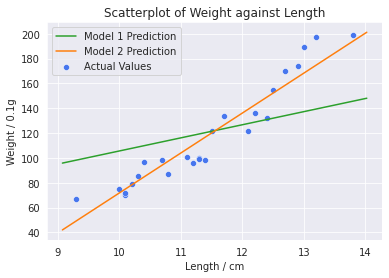

In [123]:
def plot_predictions(df: pd.DataFrame, model1: Dict[str, float], model2: Dict[str, float]):
    with sns.axes_style(style='darkgrid'):
        with sns.color_palette(palette='turbo'):
            fig, ax = plt.subplots()
            sns.scatterplot(data=df, x='Length', y='Weight', ax=ax)
            x_bounds = np.array(ax.get_xlim())

            sns.lineplot(x=x_bounds, y=model1['b'] * x_bounds, ax=ax, color='tab:green')
            sns.lineplot(x=x_bounds, y=model2['a'] + model2['b'] * x_bounds, ax=ax, color='tab:orange')

            ax.set_xlabel('Length / cm')
            ax.set_ylabel('Weight / 0.1g')
            ax.set_title(label='Scatterplot of Weight against Length')

            ax.legend(labels=('Model 1 Prediction', 'Model 2 Prediction', 'Actual Values'))

            plt.savefig(fname='./scatterplot-best-fit-lines.png')

plot_predictions(df=df, model1={'b': 10.55549}, model2={'a': -249.92471, 'b': 32.16480})

## Part 3

In [86]:
def gradient_descent_a_b_c(
    df: pd.DataFrame, 
    a_start: float, b_start: float, c_start: float,
    alpha: float = 0.01, epsilon: float = 0.0001, max_iter: int = 100
):
    def E(df: pd.DataFrame, a: float, b: float, c: float):
        y_true = df['Weight']
        y_hat = a + b * df['Length'] + c * df['Width']
        err = y_true - y_hat
        return (err ** 2).mean()
    
    def E_a(df: pd.DataFrame, a: float, b: float, c: float):
        y_true = df['Weight']
        y_hat = a + b * df['Length'] + c * df['Width']
        err = y_true - y_hat
        return -2 * err.mean()
    
    def E_b(df:pd.DataFrame, a: float, b: float, c: float):
        y_true = df['Weight']
        y_hat = a + b * df['Length'] + c * df['Width']
        err = y_true - y_hat
        return -2 * (err * df['Length']).mean()
    
    def E_c(df:pd.DataFrame, a: float, b: float, c: float):
        y_true = df['Weight']
        y_hat = a + b * df['Length'] + c * df['Width']
        err = y_true - y_hat
        return -2 * (err * df['Width']).mean()
    
    def gradient_descent(
        df: pd.DataFrame,
        f: Callable, f_a: Callable, f_b: Callable, f_c: Callable,
        a_start: float, b_start: float, c_start: float,
        alpha: float = 0.001, epsilon: float = 0.0001,
        max_iter: int = 100
    ):
        a = a_start
        b = b_start
        c = c_start

        difference = epsilon + 1
        e = f(df, a, b, c)

        print(f'i=0; a={a:10.2f}; b={b:10.2f}; c={c:10.5f}; e={e:10.2f}')

        for i in range(1, max_iter + 1):
            pd_a = f_a(df, a=a, b=b, c=c)
            pd_b = f_b(df, a=a, b=b, c=c)
            pd_c = f_c(df, a=a, b=b, c=c)

            a_next = a - alpha * pd_a
            b_next = b - alpha * pd_b
            c_next = c - alpha * pd_c
            e_next = f(df, a_next, b_next, c_next)
            difference = abs(e_next - e)
            print(f'\ri={i}; a={a:10.2f}; b={b:10.2f}; c={c:10.5f}; e={e:10.2f}', end='')
            if min(difference, pd_a ** 2 + pd_b ** 2 + pd_c ** 2) < epsilon:
                break
            a = a_next
            b = b_next
            c = c_next
            e = e_next
        
        print(f'\ni={i}; a={a:10.5f}; b={b:10.5f}; c={c:10.5f}; e={e:10.5f}; v={pd_a ** 2 + pd_b ** 2 + pd_c ** 2}')
    
    gradient_descent(df=df,
        f=E, f_a=E_a, f_b=E_b, f_c=E_c,
        a_start=a_start, b_start=b_start, c_start=c_start,
        alpha=alpha, epsilon=epsilon, max_iter=max_iter)

gradient_descent_a_b_c(df=df, a_start=-200, b_start=20, c_start=60, alpha=0.007, epsilon=0.001, max_iter=20000)

i=0; a=   -200.00; b=     20.00; c=  60.00000; e=     74.81
i=45; a=   -200.02; b=     20.44; c=  60.12044; e=     47.56
i=45; a=-200.02466; b=  20.43726; c=  60.12044; e=  47.55530; v=0.9749029265047006


In [17]:
import plotly.express as px

fig = px.scatter_3d(data_frame=df, x='Length', y='Width', z='Weight')
fig.add_trace(px.line_3d(x=np.linspace(10, 13), y=np.linspace(1, 2), z=-201.17285 + 20.11287 * np.linspace(10, 13) + 63.58511 * np.linspace(1, 2)).update_traces(line={'color': 'red'}).data[0])
fig